In [28]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
path = r'./input/result_40.xlsx'
# path = r'./input/result.xlsx'
data = pd.read_excel(path)
data

,Noisiness,ESL,ASL,PSL,ESL-SL,SL-ASL,PSL-SL,SL
0,7.13525,54,68.070,52.250,-5.97,-8.100,-7.720,59.97
1,7.13525,55,64.170,56.220,-4.97,-4.200,-3.750,59.97
2,7.13525,56,65.070,57.440,-3.97,-5.100,-2.530,59.97
3,7.13525,55,64.770,52.245,-4.97,-4.800,-7.725,59.97
4,7.13525,62,59.370,58.200,2.03,0.600,-1.770,59.97
...,...,...,...,...,...,...,...,...
435,3.27049,62,56.275,64.495,2.72,3.005,5.215,59.28
436,3.27049,65,53.275,61.680,5.72,6.005,2.400,59.28
437,3.27049,63,57.475,63.795,3.72,1.805,4.515,59.28
438,3.27049,61,59.275,61.830,1.72,0.005,2.550,59.28


In [30]:
x_data = np.array(data['Noisiness'])
# y_data = np.array(data['ESL-SL'])
# y_data = np.array(data['SL-ASL'])
y_data = np.array(data['PSL-SL'])

In [31]:
# 定义拟合函数
x0 = 4.18


def piecewise_linear(x, k1, k2, y0):
    return np.piecewise(x,
                        [x <= x0, x > x0],
                        [lambda x: k1 * (x - x0) + y0,
                         lambda x: k2 * (x - x0) + y0])

In [32]:
# 拟合数据
popt, pcov = curve_fit(piecewise_linear, x_data, y_data)

In [33]:
# 输出拟合结果
k1 = popt[0]
k2 = popt[1]
y0 = popt[2]
print('k1 =', k1)
print('k2 =', k2)
print('y0 =', y0)

k1 = -7.3195713114576435
k2 = -0.7214357854072477
y0 = -3.8187752870058693


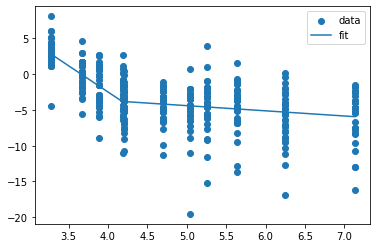

In [34]:
# 绘制拟合结果
x = np.linspace(min(x_data), max(x_data), 100)
plt.scatter(x_data, y_data, label='data')
plt.plot(x, piecewise_linear(x, *popt), label='fit')
plt.legend()
plt.show()

In [35]:
def function(x):
    if x <= x0:
        return k1 * (x - x0) + y0
    else:
        return k2 * (x - x0) + y0

In [36]:
y_pred = np.zeros_like(x_data)
for i in range(len(x_data)):
    y_pred[i] = function(x_data[i])
rss = np.sum((y_data - y_pred) ** 2)
rmse = np.sqrt(mean_squared_error(y_data, y_pred))
r2 = r2_score(y_data, y_pred)

print("RSS = %.2f" % rss)
print("RMSE = %.2f" % rmse)
print("R^2 = %.2f" % r2)

RSS = 3459.23
RMSE = 2.80
R^2 = 0.44
